In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os


In [ ]:
model_path = '/content/drive/MyDrive/Garbage_Classification/Week1/garbage_classifier_model.h5'
model = load_model(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
# Step 5: Function to load and preprocess image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32') / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)   # Add batch dimension
    return img


Saving metal can trash.jpeg to metal can trash.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


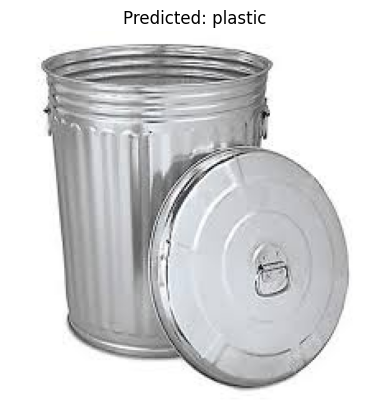

In [ ]:
# Step 6: Upload a test image manually
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = class_labels[np.argmax(prediction)]

    # Show the result
    img_display = cv2.imread(img_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()
